<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

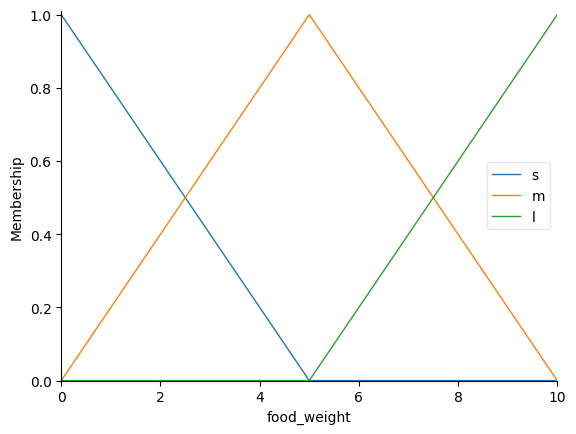

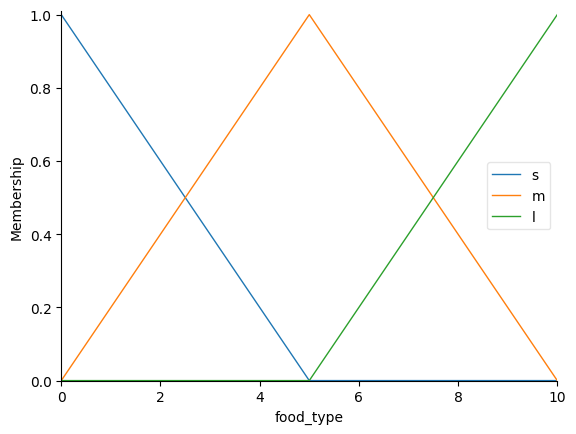

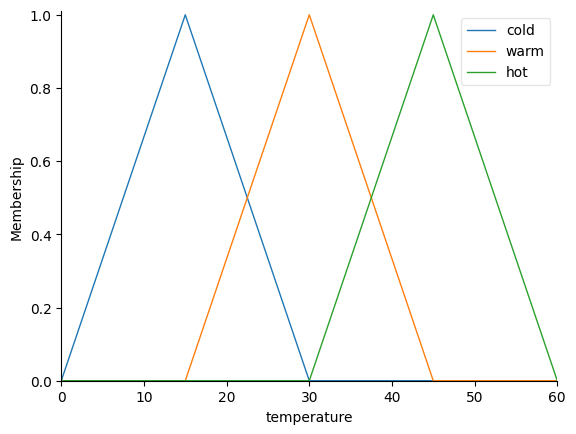

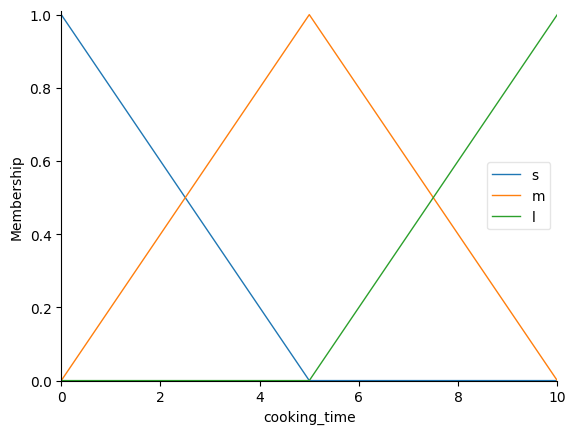

In [17]:
#2.6 lovisong
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food_weight=ctrl.Antecedent(np.arange(0,10.1,0.1),'food_weight')
food_type=ctrl.Antecedent(np.arange(0,10.1,0.1),'food_type')
temperature=ctrl.Antecedent(np.arange(0,60.1,0.1),'temperature')
cooking_time=ctrl.Consequent(np.arange(0,10.1,0.1),'cooking_time')
p_level=ctrl.Consequent(np.arange(0,10.1,0.1),'p_level')
food_weight['s']=fuzz.trimf(food_weight.universe,[0,0,5])
food_weight['m']=fuzz.trimf(food_weight.universe,[0,5,10])
food_weight['l']=fuzz.trimf(food_weight.universe,[5,10,10])
food_type['s']=fuzz.trimf(food_type.universe,[0,0,5])
food_type['m']=fuzz.trimf(food_type.universe,[0,5,10])
food_type['l']=fuzz.trimf(food_type.universe,[5,10,10])
temperature['cold']=fuzz.trimf(temperature.universe,[0,15,30])
temperature['warm']=fuzz.trimf(temperature.universe,[15,30,45])
temperature['hot']=fuzz.trimf(temperature.universe,[30,45,60])
cooking_time['s']=fuzz.trimf(cooking_time.universe,[0,0,5])
cooking_time['m']=fuzz.trimf(cooking_time.universe,[0,5,10])
cooking_time['l']=fuzz.trimf(cooking_time.universe,[5,10,10])
p_level['s']=fuzz.trimf(p_level.universe,[0,0,5])
p_level['m']=fuzz.trimf(p_level.universe,[0,5,10])
p_level['l']=fuzz.trimf(p_level.universe,[5,10,10])
food_weight.view()
food_type.view()
temperature.view()
cooking_time.view()

Cooking Time: 4.914467253176927
P Level: 5.5454815736707435


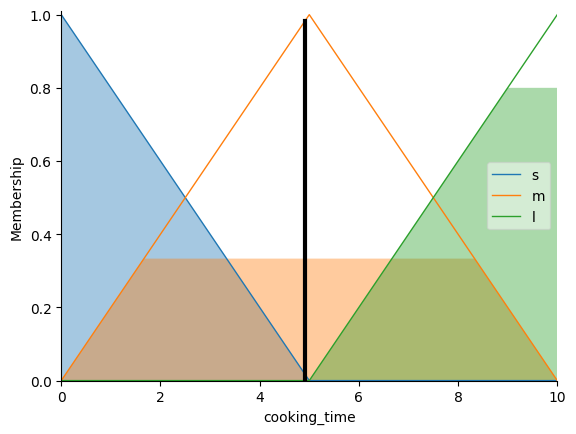

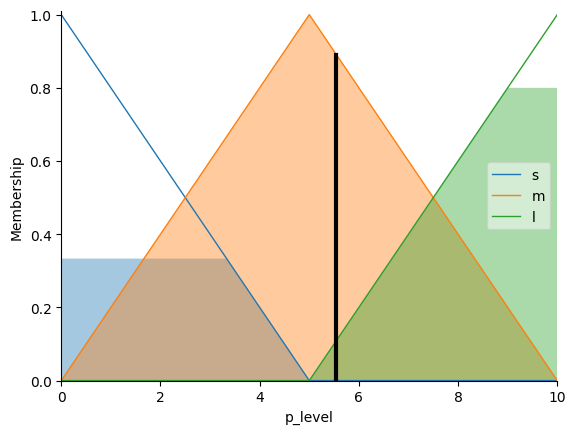

In [18]:
rule1=ctrl.Rule(food_weight['s'],cooking_time['s'])
rule2=ctrl.Rule(food_weight['m'],cooking_time['m'])
rule3=ctrl.Rule(food_weight['l'],cooking_time['l'])
rule4=ctrl.Rule(food_type['s'],p_level['s'])
rule5=ctrl.Rule(food_type['m'],p_level['m'])
rule6=ctrl.Rule(food_type['l'],p_level['l'])
rule7=ctrl.Rule(temperature['cold'],cooking_time['l'])
rule8=ctrl.Rule(temperature['warm'],cooking_time['m'])
rule9=ctrl.Rule(temperature['hot'],cooking_time['s'])
rule10=ctrl.Rule(food_type['l']|food_weight['l']|temperature['cold'],(cooking_time['l'],p_level['l']))
rule11=ctrl.Rule(food_type['s']|food_weight['m']|temperature['warm'],(cooking_time['m'],p_level['s']))
rule12=ctrl.Rule(food_type['m']|food_weight['s']|temperature['hot'],(cooking_time['s'],p_level['m']))
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['food_weight']=9
control_sim.input['food_type']=5
control_sim.input['temperature']=20
control_sim.compute()
print(f"Cooking Time: {control_sim.output['cooking_time']}")
print(f"P Level: {control_sim.output['p_level']}")
cooking_time.view(sim=control_sim)
p_level.view(sim=control_sim)